#Randomized Structure learning on orignial PC algorithm

#Using pgmpy implementation which is open source

#Randomized approach will use the mathematical analysis given in the report




Dependencies



In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import itertools
from IPython.display import Image, display
from itertools import combinations
from scipy.stats import chi2_contingency
from pgmpy.models import BayesianNetwork
import pandas as pd
from IPython.display import Image, display
from pgmpy.estimators import PC
from pgmpy.estimators import BayesianEstimator

from itertools import chain, combinations, permutations

import networkx as nx
from joblib import Parallel, delayed
from tqdm.auto import tqdm

from pgmpy import config
from pgmpy.base import PDAG
from pgmpy.estimators import StructureEstimator
from pgmpy.estimators.CITests import *
from pgmpy.global_vars import logger

# Datasets

*   Asia cancer dataset - add reference
*   London property dataset - add reference
*   Alarm dataset - add reference
*   Hepar2 liver disorder dataset - add reference



In [ ]:
df=pd.read_csv('asia_cancer.csv', encoding='utf-8')                           # YOU MAY NEED TO CHANGE THE PATH HERE
df

df = df.replace({'yes': 1, 'no': 0})

# Display the processed df
print("Processed df:")
print(df)

Processed df:
       asia  tub  smoke  lung  bronc  either  xray  dysp
0         0    0      0     0      0       0     0     0
1         0    0      1     0      0       0     0     0
2         0    0      1     0      1       0     0     1
3         0    0      0     0      0       0     0     0
4         0    0      1     1      1       1     1     1
...     ...  ...    ...   ...    ...     ...   ...   ...
99995     0    0      1     0      0       0     0     0
99996     0    0      1     0      0       0     0     0
99997     0    0      0     0      0       0     0     0
99998     0    0      1     0      1       0     0     1
99999     0    0      0     0      0       0     0     0

[100000 rows x 8 columns]


<ipython-input-37-433203db7eb1>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'yes': 1, 'no': 0})


In [ ]:
df2 = pd.read_csv('PROPERTY_DATA.csv', encoding='utf-8')
df2

df2.replace( {'propertyExpenses': {'<5k': 1, '8-9k': 2, '>9k': 3,'5-8k': 4},
             'propertyManagement': {'upTo9%':1, '9-13%':2, '13-17%':3, '>17%':4},
             'rentalGrossProfit':  {'<10k':1, '10-15k':2, '15-20k':3, '20-25k':4, '25-30k':5, '>30k':6},
             'actualRentalIncome': {'<25k':1, '25-30k':2, '30-35k':3, '35-40k':4, '40-45k':5, '>45k':6},
             'otherPropertyExpenses': {'<3k':1, '3-5k':2, '>5k':3},
             'rentalNetProfitBeforeInterest': {'<15k':1, '15-20k':2, '20-25k':3, '25-30k':4, '30-35k':5, '>35k':6},
             'rentalGrossYield': {'<2%':1, '2-3%':2, '3-4%':3, '4-5%':4, '>5%':5},
             'rentalIncomeT+1': {'<25k':1, '25-30k':2, '30-35k':3, '35-40k':4, '40-45k':5, '>45k':6},
             'rentalIncomeLoss%': {'<3%':1, '3-5%':2, '5-7%':3, '7-9%':4, '>9%':5},
             'rentalIncome': {'<25k':1, '25-30k':2, '30-35k':3, '35-40k':4, '40-45k':5, '>45k':6},
             'propertyPurchaseValue': {'<750k':1, '750k-1m':2, '1-1.25m':3, '1.25-1.5m':4, '1.5-1.75m':5, '>1.75m':6},
             'LTV': {'<20%':1, '20-25%':2, '25-50%':3, '50-65%':4, '>65%':5},
             'propertyValueT+1': {'<750k':1, '750k-1m':2, '1-1.25m':3, '1.25-1.5m':4, '1.5-1.75m':5, '>1.75m':6},
             'stampDutyTaxBand': {'0':1, '1':2, '2':3},
             'stampDutyTax': {'<55k':1, '55-900k':2},
             'capitalGains': {'<40k':1, '40-80k':2, '80-120k':3, '120-160k':4, '>160k':5},
             'otherPropertyExpensesT+1': {'<3k':1, '3-5k':2, '>5k':3},
             'propertyExpensesGrowth': {'<3%':1, '3-5%':2, '5-7%':3, '7-9%':4, '>9%':5},
             'rentalGrowth': {'<3%':1, '3-5%':2, '5-7%':3, '7-9%':4, '>9%':5},
             'capitalGrowth': {'<3%':1, '3-5%':2, '5-7%':3, '7-9%':4, '>9%':5},
             'incomeTax': {'<10%':1, '10-20%':2, '20-30%':3, '>30%':4},
             'interestTaxRelief': {'<1k':1, '1-2k':2, '2-3k':3, '3-4k':4, '4-5k':5, '>5k':6},
             'netProfit': {'<-5k':1, '-5-5k':2, '5-10k':3, '10-15k':4, '15-20k':5, '20-25k':6, '>25k':7},
             'interest': {'<5k':1, '5-10k':2, '10-15k':3, '15-20k':4, '20-25k':5, '>25k':6},
             'borrowing': {'<200k':1, '200-300k':2, '300-400k':3, '>400k':4},
             'otherInterestFees': {'<1k': 1, '1-1.5k': 2, '>1.5k': 3}}, inplace = True)
df2

<ipython-input-19-e8d7838cadab>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2.replace( {'propertyExpenses': {'<5k': 1, '8-9k': 2, '>9k': 3,'5-8k': 4},


,propertyManagement,propertyExpenses,rentalGrossProfit,actualRentalIncome,otherPropertyExpenses,rentalNetProfitBeforeInterest,rentalGrossYield,rentalIncomeT+1,rentalIncomeLoss%,rentalIncome,...,propertyExpensesGrowth,rentalGrowth,capitalGrowth,incomeTax,interestTaxRelief,netProfit,interest,interestRate,borrowing,otherInterestFees
0,4,2,5,4,1,2,1,4,2,4,...,3,3,3,3,1,4,1,2,1,1
1,1,4,6,5,2,3,3,6,1,5,...,2,3,3,4,2,5,2,2,3,3
2,2,2,6,6,3,4,5,6,4,6,...,3,1,3,2,5,4,5,4,4,1
3,4,3,4,3,3,2,1,4,2,3,...,2,2,3,2,4,3,4,4,3,3
4,4,3,6,5,2,3,5,6,3,6,...,4,1,3,3,2,5,2,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2,2,4,3,3,2,2,4,5,3,...,5,5,1,2,3,3,3,6,1,3
99996,3,2,4,3,2,2,2,3,3,4,...,1,3,5,3,5,2,5,6,3,2
99997,1,2,6,5,3,3,2,6,3,5,...,1,1,3,3,3,4,3,4,2,3
99998,2,2,6,5,2,6,5,5,2,6,...,5,2,2,2,3,7,3,4,2,2


In [ ]:
from sklearn.preprocessing import LabelEncoder
df3 = pd.read_csv('alarm10K.csv', encoding='utf-8')
df3

# Step 1: Encode categorical and boolean columns to numerical codes
# Apply LabelEncoder to each column to convert categorical/boolean columns to numerical
for column in df3.columns:
    if df3[column].dtype == 'object' or df3[column].dtype == 'bool':
        le = LabelEncoder()
        df3[column] = le.fit_transform(df3[column])

# Step 2: Check for any missing values
if df3.isnull().sum().any():
    print("Warning: Missing values detected. Fill or drop them as needed.")
    df3 = df3.dropna()  # Alternatively, fill with mean, median, or mode as appropriate

# Display the processed df3
print("Processed df3:")
print(df3.head())

Processed df3:
   HISTORY  CVP  PCWP  HYPOVOLEMIA  LVEDVOLUME  LVFAILURE  STROKEVOLUME  \
0        0    2     2            0           2          0             2   
1        0    2     2            0           2          0             1   
2        0    2     2            0           2          0             2   
3        0    2     2            0           2          0             2   
4        0    2     2            0           2          0             2   

   ERRLOWOUTPUT  HRBP  HREKG  ...  MINVOLSET  VENTMACH  VENTTUBE  VENTLUNG  \
0             0     0      0  ...          2         3         3         1   
1             0     0      0  ...          0         0         3         3   
2             0     2      0  ...          0         0         0         1   
3             0     0      0  ...          2         2         1         3   
4             0     0      0  ...          2         2         1         3   

   VENTALV  ARTCO2  CATECHOL  HR  CO  BP  
0        0       1    

In [ ]:
from sklearn.preprocessing import LabelEncoder
df4 = pd.read_csv('HEPAR_simulated_patients.csv', encoding='utf-8')
df4

# Step 1: Encode categorical and boolean columns to numerical codes
# Apply LabelEncoder to each column to convert categorical/boolean columns to numerical
for column in df4.columns:
    if df4[column].dtype == 'object' or df4[column].dtype == 'bool':
        le = LabelEncoder()
        df4[column] = le.fit_transform(df4[column])

# Step 2: Check for any missing values
if df4.isnull().sum().any():
    print("Warning: Missing values detected. Fill or drop them as needed.")
    df4 = df4.dropna()  # Alternatively, fill with mean, median, or mode as appropriate

# Display the processed df4
print("Processed df4:")
print(df4.head())

Processed df4:
   alcoholism  vh_amn  hepatotoxic  THepatitis  hospital  surgery  gallstones  \
0           0       1            0           0         0        0           0   
1           0       0            0           0         0        0           1   
2           0       0            0           0         1        0           0   
3           0       0            0           0         1        0           0   
4           0       1            0           0         0        0           1   

   choledocholithotomy  injections  transfusion  ...  spiders  jaundice  \
0                    0           0            0  ...        0         1   
1                    0           0            0  ...        0         1   
2                    0           1            0  ...        0         0   
3                    0           0            0  ...        0         1   
4                    1           0            0  ...        1         0   

   albumin  edge  irregular_liver  hbc_anti  hc

In [ ]:
from sklearn.preprocessing import LabelEncoder
df5 = pd.read_csv('hailfinder.csv', encoding='utf-8')
df5

# Step 1: Encode categorical and boolean columns to numerical codes
# Apply LabelEncoder to each column to convert categorical/boolean columns to numerical
for column in df5.columns:
    if df5[column].dtype == 'object' or df5[column].dtype == 'bool':
        le = LabelEncoder()
        df5[column] = le.fit_transform(df5[column])

# Step 2: Check for any missing values
if df5.isnull().sum().any():
    print("Warning: Missing values detected. Fill or drop them as needed.")
    df5 = df5.dropna()  # Alternatively, fill with mean, median, or mode as appropriate

# Display the processed df5
print("Processed df5:")
print(df5.head())

Processed df5:
   N07muVerMo  SubjVertMo  QGVertMotion  CombVerMo  AreaMesoALS  SatContMoist  \
0           1           3             0          1            1             1   
1           1           1             1          1            1             0   
2           2           1             1          2            2             3   
3           3           0             1          1            1             0   
4           2           1             1          3            3             3   

   RaoContMoist  CombMoisture  AreaMoDryAir  VISCloudCov  ...  MeanRH  \
0             2             1             1            2  ...       2   
1             2             1             1            2  ...       1   
2             1             3             2            0  ...       0   
3             3             3             1            0  ...       2   
4             0             2             3            2  ...       1   

   MidLLapse  MvmtFeatures  RHRatio  SfcWndShfDis  SynForcn

# PC class and algorithm with Iterative skeleton learning approach:

---

pgm py implementation

---




In [ ]:
CI_TESTS = {
    "chi_square": chi_square,
    "independence_match": independence_match,
    "pearsonr": pearsonr,
    "g_sq": g_sq,
    "log_likelihood": log_likelihood,
    "modified_log_likelihood": modified_log_likelihood,
    "power_divergence": power_divergence,
}

In [ ]:
class PC(StructureEstimator):
    """
    Class for constraint-based estimation of DAGs using the PC algorithm
    from a given data set.  Identifies (conditional) dependencies in data
    set using statistical independence tests and estimates a DAG pattern
    that satisfies the identified dependencies. The DAG pattern can then be
    completed to a faithful DAG, if possible.

    Parameters
    ----------
    data: pandas DataFrame object
        dataframe object where each column represents one variable.  (If some
        values in the data are missing the data cells should be set to
        `numpy.nan`.  Note that pandas converts each column containing
        `numpy.nan`s to dtype `float`.)

    References
    ----------
    [1] Koller & Friedman, Probabilistic Graphical Models - Principles and Techniques,
        2009, Section 18.2
    [2] Neapolitan, Learning Bayesian Networks, Section 10.1.2 for the PC algorithm (page 550), http://www.cs.technion.ac.il/~dang/books/Learning%20Bayesian%20Networks(Neapolitan,%20Richard).pdf
    """

    def __init__(self, data=None, independencies=None, **kwargs):
        super(PC, self).__init__(data=data, independencies=independencies, **kwargs)

    def estimate(
        self,
        variant="stable",
        ci_test="chi_square",
        max_cond_vars=5,
        return_type="dag",
        significance_level=0.01,
        n_jobs=-1,
        show_progress=True,
        **kwargs,
    ):

        # Step 0: Do checks that the specified parameters are correct, else throw meaningful error.
        if variant not in ("orig", "stable", "parallel"):
            raise ValueError(
                f"variant must be one of: orig, stable, or parallel. Got: {variant}"
            )
        elif (not callable(ci_test)) and (
            ci_test.lower() not in (list(CI_TESTS.keys()) + ["independence_match"])
        ):
            raise ValueError(
                "ci_test must be a callable or one of the tests defined in CITests.py"
            )

        if (ci_test == "independence_match") and (self.independencies is None):
            raise ValueError(
                "For using independence_match, independencies argument must be specified"
            )
        elif (ci_test in set(CI_TESTS.keys()) - set(["independence_match"])) and (
            self.data is None
        ):
            raise ValueError(
                "For using Chi Square or Pearsonr, data argument must be specified"
            )

        # Step 1: Run the PC algorithm to build the skeleton and get the separating sets.
        skel, separating_sets = self.build_skeleton(
            ci_test=ci_test,
            max_cond_vars=max_cond_vars,
            significance_level=significance_level,
            variant=variant,
            n_jobs=n_jobs,
            show_progress=show_progress,
            **kwargs,
        )

        if return_type.lower() == "skeleton":
            return skel, separating_sets

        # Step 2: Orient the edges based on build the PDAG/CPDAG.
        pdag = self.skeleton_to_pdag(skel, separating_sets)

        # Step 3: Either return the CPDAG or fully orient the edges to build a DAG.
        if self.data is not None:
            pdag.add_nodes_from(set(self.data.columns) - set(pdag.nodes()))

        if return_type.lower() in ("pdag", "cpdag"):
            return pdag
        elif return_type.lower() == "dag":
            return pdag.to_dag()
        else:
            raise ValueError(
                f"return_type must be one of: dag, pdag, cpdag, or skeleton. Got: {return_type}"
            )


    def build_skeleton(
        self,
        ci_test="chi_square",
        max_cond_vars=5,
        significance_level=0.01,
        variant="stable",
        n_jobs=-1,
        show_progress=True,
        **kwargs,
    ):

        # Initialize initial values and structures.
        lim_neighbors = 0
        separating_sets = dict()
        if not callable(ci_test):
            try:
                ci_test = CI_TESTS[ci_test]
            except KeyError:
                raise ValueError(
                    f"ci_test must either be one of {list(CI_TESTS.keys())}, or a function. Got: {ci_test}"
                )

        if show_progress and config.SHOW_PROGRESS:
            pbar = tqdm(total=max_cond_vars)
            pbar.set_description("Working for n conditional variables: 0")

        # Step 1: Initialize a fully connected undirected graph
        graph = nx.complete_graph(n=self.variables, create_using=nx.Graph)

        # Exit condition: 1. If all the nodes in graph has less than `lim_neighbors` neighbors.
        #             or  2. `lim_neighbors` is greater than `max_conditional_variables`.
        while not all(
            [len(list(graph.neighbors(var))) < lim_neighbors for var in self.variables]
        ):
            # Step 2: Iterate over the edges and find a conditioning set of
            # size `lim_neighbors` which makes u and v independent.
            if variant == "orig":
                for u, v in graph.edges():
                    for separating_set in chain(
                        combinations(set(graph.neighbors(u)) - set([v]), lim_neighbors),
                        combinations(set(graph.neighbors(v)) - set([u]), lim_neighbors),
                    ):
                        # If a conditioning set exists remove the edge, store the separating set
                        # and move on to finding conditioning set for next edge.
                        if ci_test(
                            u,
                            v,
                            separating_set,
                            data=self.data,
                            independencies=self.independencies,
                            significance_level=significance_level,
                            **kwargs,
                        ):
                            separating_sets[frozenset((u, v))] = separating_set
                            graph.remove_edge(u, v)
                            break

            elif variant == "stable":
                # In case of stable, precompute neighbors as this is the stable algorithm.
                neighbors = {node: set(graph[node]) for node in graph.nodes()}
                for u, v in graph.edges():
                    for separating_set in chain(
                        combinations(set(neighbors[u]) - set([v]), lim_neighbors),
                        combinations(set(neighbors[v]) - set([u]), lim_neighbors),
                    ):
                        # If a conditioning set exists remove the edge, store the
                        # separating set and move on to finding conditioning set for next edge.
                        if ci_test(
                            u,
                            v,
                            separating_set,
                            data=self.data,
                            independencies=self.independencies,
                            significance_level=significance_level,
                            **kwargs,
                        ):
                            separating_sets[frozenset((u, v))] = separating_set
                            graph.remove_edge(u, v)
                            break

            elif variant == "parallel":
                neighbors = {node: set(graph[node]) for node in graph.nodes()}

                def _parallel_fun(u, v):
                    for separating_set in chain(
                        combinations(set(graph.neighbors(u)) - set([v]), lim_neighbors),
                        combinations(set(graph.neighbors(v)) - set([u]), lim_neighbors),
                    ):
                        if ci_test(
                            u,
                            v,
                            separating_set,
                            data=self.data,
                            independencies=self.independencies,
                            significance_level=significance_level,
                            **kwargs,
                        ):
                            return (u, v), separating_set

                results = Parallel(n_jobs=n_jobs)(
                    delayed(_parallel_fun)(u, v) for (u, v) in graph.edges()
                )
                for result in results:
                    if result is not None:
                        (u, v), sep_set = result
                        graph.remove_edge(u, v)
                        separating_sets[frozenset((u, v))] = sep_set

            else:
                raise ValueError(
                    f"variant must be one of (orig, stable, parallel). Got: {variant}"
                )

            # Step 3: After iterating over all the edges, expand the search space by increasing the size
            #         of conditioning set by 1.
            if lim_neighbors >= max_cond_vars:
                logger.info(
                    "Reached maximum number of allowed conditional variables. Exiting"
                )
                break
            lim_neighbors += 1

            if show_progress and config.SHOW_PROGRESS:
                pbar.update(1)
                pbar.set_description(
                    f"Working for n conditional variables: {lim_neighbors}"
                )

        if show_progress and config.SHOW_PROGRESS:
            pbar.close()
        return graph, separating_sets

    def skeleton_to_pdag(self, skeleton, separating_sets):

        pdag = skeleton.to_directed()
        node_pairs = list(permutations(pdag.nodes(), 2))

        # 1) for each X-Z-Y, if Z not in the separating set of X,Y, then orient edges as X->Z<-Y
        # (Algorithm 3.4 in Koller & Friedman PGM, page 86)
        for pair in node_pairs:
            X, Y = pair
            if not skeleton.has_edge(X, Y):
                for Z in set(skeleton.neighbors(X)) & set(skeleton.neighbors(Y)):
                    if Z not in separating_sets[frozenset((X, Y))]:
                        pdag.remove_edges_from([(Z, X), (Z, Y)])

        progress = True
        while progress:  # as long as edges can be oriented (removed)
            num_edges = pdag.number_of_edges()

            # 2) for each X->Z-Y, orient edges to Z->Y
            # (Explanation in Koller & Friedman PGM, page 88)
            for pair in node_pairs:
                X, Y = pair
                if not pdag.has_edge(X, Y):
                    for Z in (set(pdag.successors(X)) - set(pdag.predecessors(X))) & (
                        set(pdag.successors(Y)) & set(pdag.predecessors(Y))
                    ):
                        pdag.remove_edge(Y, Z)

            # 3) for each X-Y with a directed path from X to Y, orient edges to X->Y
            for pair in node_pairs:
                X, Y = pair
                if pdag.has_edge(Y, X) and pdag.has_edge(X, Y):
                    for path in nx.all_simple_paths(pdag, X, Y):
                        is_directed = True
                        for src, dst in list(zip(path, path[1:])):
                            if pdag.has_edge(dst, src):
                                is_directed = False
                        if is_directed:
                            pdag.remove_edge(Y, X)
                            break

            # 4) for each X-Z-Y with X->W, Y->W, and Z-W, orient edges to Z->W
            for pair in node_pairs:
                X, Y = pair
                for Z in (
                    set(pdag.successors(X))
                    & set(pdag.predecessors(X))
                    & set(pdag.successors(Y))
                    & set(pdag.predecessors(Y))
                ):
                    for W in (
                        (set(pdag.successors(X)) - set(pdag.predecessors(X)))
                        & (set(pdag.successors(Y)) - set(pdag.predecessors(Y)))
                        & (set(pdag.successors(Z)) & set(pdag.predecessors(Z)))
                    ):
                        pdag.remove_edge(W, Z)

            progress = num_edges > pdag.number_of_edges()

        # TODO: This is temp fix to get a PDAG object.
        edges = set(pdag.edges())
        undirected_edges = []
        directed_edges = []
        for u, v in edges:
            if (v, u) in edges:
                undirected_edges.append((u, v))
            else:
                directed_edges.append((u, v))
        return PDAG(directed_ebunch=directed_edges, undirected_ebunch=undirected_edges)



Structure Estimation for **asia cancer dataset**

*   Iterative approach
*   Time calculation



  0%|          | 0/5 [00:00<?, ?it/s]


Execution Time: 2.18 seconds
                0.04 minutes
Number of nodes: 8
Number of edges: 7

Edges in the learned DAG:
lung -> either
either -> xray
either -> dysp
bronc -> dysp
asia -> tub
smoke -> lung
smoke -> bronc


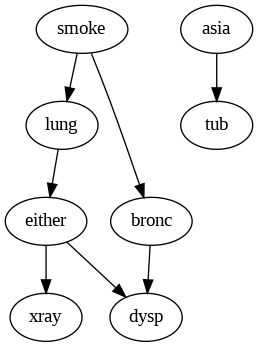

In [ ]:
# Import required libraries
import pandas as pd
import networkx as nx
import time

# Assuming df is your pandas DataFrame
# First, let's create a PC estimator instance

start_time1 = time.time()
pc = PC(data=df)

# Run the PC algorithm
# change the parameters if needed
estimated_model1 = pc.estimate()

execution_time1 = time.time() - start_time1

print(f"\nExecution Time: {execution_time1:.2f} seconds")
print(f"                {execution_time1/60:.2f} minutes")

# The estimated_model is now a NetworkX DiGraph object
# Let's print some basic information about the learned structure
print("Number of nodes:", estimated_model1.number_of_nodes())
print("Number of edges:", estimated_model1.number_of_edges())
print("\nEdges in the learned DAG:")
for edge in estimated_model1.edges():
    print(f"{edge[0]} -> {edge[1]}")

# If you want to visualize the graph (optional)
display(Image((nx.drawing.nx_pydot.to_pydot(estimated_model1)).create_png()))


Structure Estimation for **london property dataset**

*   Iterative approach
*   Time calculation



  0%|          | 0/5 [00:00<?, ?it/s]


Execution Time: 125.40 seconds
                2.09 minutes
Number of nodes: 27
Number of edges: 32

Edges in the learned DAG:
borrowing -> interest
borrowing -> interestTaxRelief
borrowing -> LTV
interest -> interestTaxRelief
interestRate -> interest
interestRate -> interestTaxRelief
rentalGrossProfit -> actualRentalIncome
rentalGrossProfit -> rentalNetProfitBeforeInterest
actualRentalIncome -> rentalGrossYield
actualRentalIncome -> rentalIncomeT+1
interestTaxRelief -> netProfit
capitalGains -> propertyValueT+1
propertyPurchaseValue -> rentalGrossYield
propertyPurchaseValue -> propertyValueT+1
propertyPurchaseValue -> capitalGains
propertyPurchaseValue -> LTV
otherPropertyExpenses -> propertyExpenses
otherPropertyExpenses -> otherPropertyExpensesT+1
propertyExpenses -> rentalGrossProfit
otherInterestFees -> interest
otherInterestFees -> interestTaxRelief
incomeTax -> rentalNetProfitBeforeInterest
rentalNetProfitBeforeInterest -> netProfit
rentalGrowth -> rentalIncomeT+1
capitalGrowth

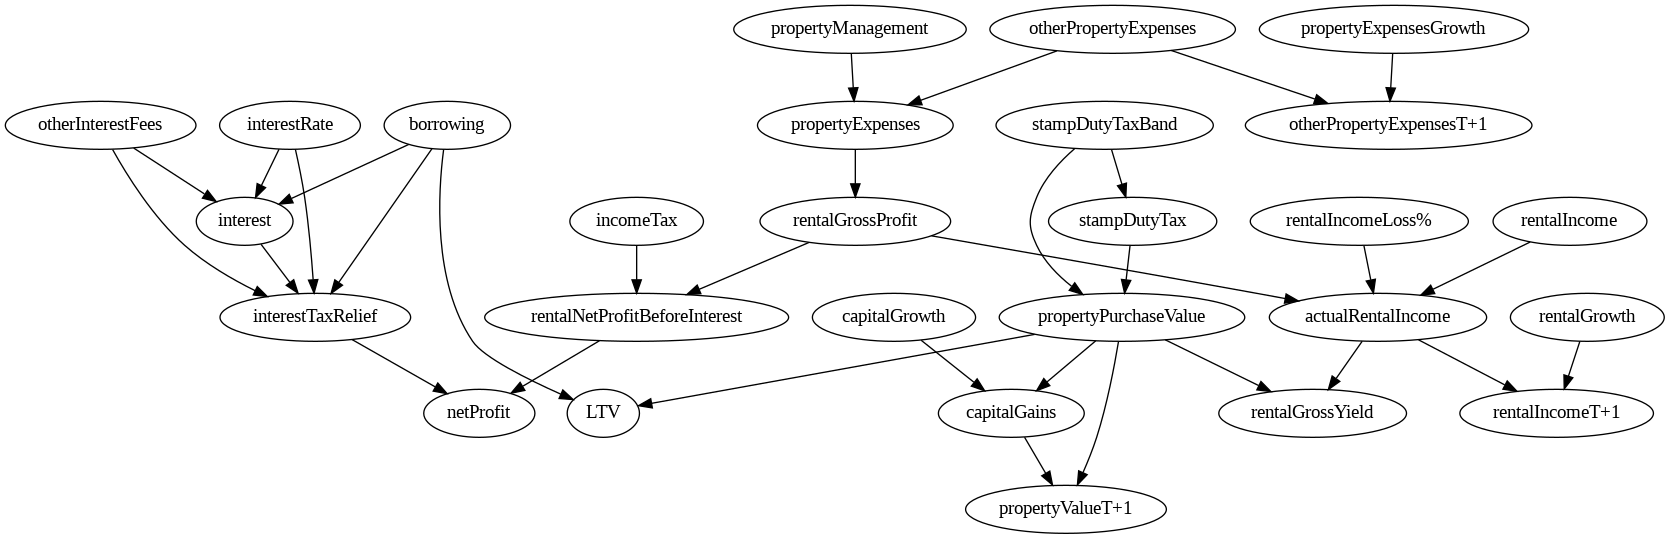

In [ ]:
# Import required libraries
import pandas as pd
import networkx as nx
import time

# Assuming df is your pandas DataFrame
# First, let's create a PC estimator instance

start_time2 = time.time()
pc = PC(data=df2)

# Run the PC algorithm
# change the parameters if needed
estimated_model2 = pc.estimate()

execution_time2 = time.time() - start_time2

print(f"\nExecution Time: {execution_time2:.2f} seconds")
print(f"                {execution_time2/60:.2f} minutes")

# The estimated_model is now a NetworkX DiGraph object
# Let's print some basic information about the learned structure
print("Number of nodes:", estimated_model2.number_of_nodes())
print("Number of edges:", estimated_model2.number_of_edges())
print("\nEdges in the learned DAG:")
for edge in estimated_model2.edges():
    print(f"{edge[0]} -> {edge[1]}")

# If you want to visualize the graph (optional)
display(Image((nx.drawing.nx_pydot.to_pydot(estimated_model2)).create_png()))

Structure Estimation for **ALARM dataset**

*   Iterative approach
*   Time calculation



  0%|          | 0/5 [00:00<?, ?it/s]


Execution Time: 65.90 seconds
                1.10 minutes
Number of nodes: 37
Number of edges: 42

Edges in the learned DAG:
DISCONNECT -> VENTTUBE
VENTTUBE -> PRESS
VENTTUBE -> VENTLUNG
HYPOVOLEMIA -> STROKEVOLUME
HYPOVOLEMIA -> LVEDVOLUME
STROKEVOLUME -> CO
VENTALV -> PVSAT
VENTALV -> INTUBATION
VENTALV -> ARTCO2
PVSAT -> SAO2
INTUBATION -> SHUNT
INTUBATION -> PRESS
INTUBATION -> VENTLUNG
VENTMACH -> VENTTUBE
VENTMACH -> MINVOLSET
HR -> HRBP
HR -> HREKG
HR -> HRSAT
HR -> CATECHOL
HR -> CO
ARTCO2 -> CATECHOL
ARTCO2 -> EXPCO2
FIO2 -> PVSAT
VENTLUNG -> MINVOL
VENTLUNG -> VENTALV
VENTLUNG -> EXPCO2
LVFAILURE -> STROKEVOLUME
LVFAILURE -> LVEDVOLUME
LVEDVOLUME -> PCWP
LVEDVOLUME -> CVP
HREKG -> HRSAT
PULMEMBOLUS -> SHUNT
MINVOL -> INTUBATION
ERRCAUTER -> HREKG
ERRCAUTER -> HRSAT
CO -> BP
ANAPHYLAXIS -> TPR
TPR -> BP
KINKEDTUBE -> PRESS
ERRLOWOUTPUT -> HRBP
PAP -> PULMEMBOLUS
HISTORY -> LVFAILURE


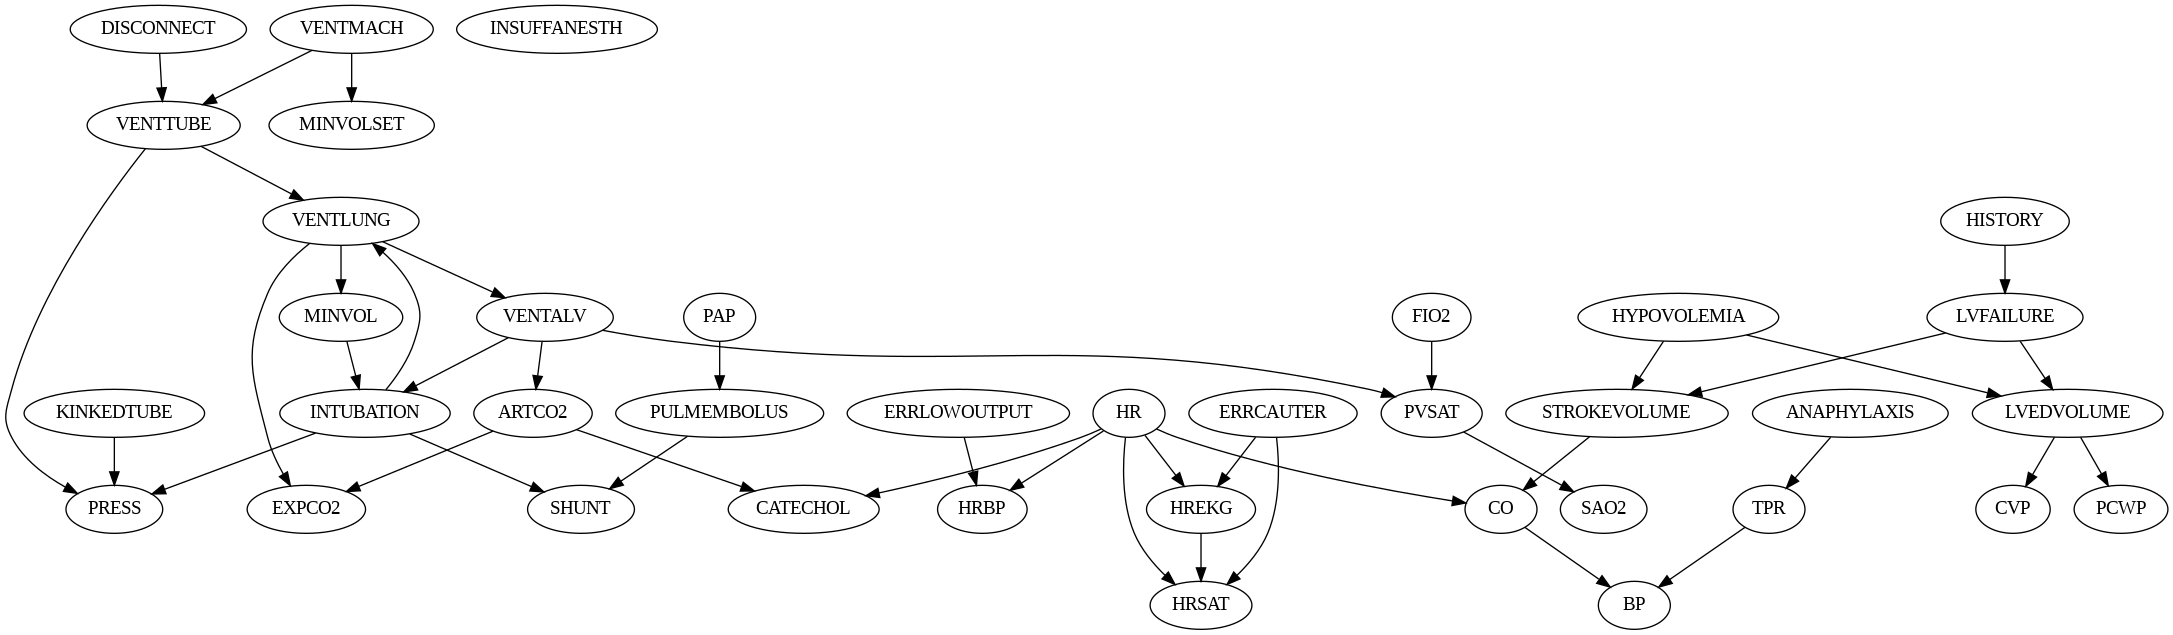

In [ ]:
# Import required libraries
import pandas as pd
import networkx as nx
import time

# Assuming df is your pandas DataFrame
# First, let's create a PC estimator instance

start_time3 = time.time()
pc = PC(data=df3)

# Run the PC algorithm
# change the parameters if needed
estimated_model3 = pc.estimate()

execution_time3 = time.time() - start_time3

print(f"\nExecution Time: {execution_time3:.2f} seconds")
print(f"                {execution_time3/60:.2f} minutes")

# The estimated_model is now a NetworkX DiGraph object
# Let's print some basic information about the learned structure
print("Number of nodes:", estimated_model3.number_of_nodes())
print("Number of edges:", estimated_model3.number_of_edges())
print("\nEdges in the learned DAG:")
for edge in estimated_model3.edges():
    print(f"{edge[0]} -> {edge[1]}")

# If you want to visualize the graph (optional)
display(Image((nx.drawing.nx_pydot.to_pydot(estimated_model3)).create_png()))


Structure Estimation for **HEPAR2 dataset**

*   Iterative approach
*   Time calculation



  0%|          | 0/5 [00:00<?, ?it/s]


Execution Time: 1374.66 seconds
                22.91 minutes
Number of nodes: 70
Number of edges: 43

Edges in the learned DAG:
age -> Hyperbilirubinemia
age -> PBC
skin -> bilirubin
hbsag_anti -> vh_amn
hbsag -> ChHepatitis
hbsag -> vh_amn
Steatosis -> Cirrhosis
Cirrhosis -> edge
Cirrhosis -> carcinoma
Cirrhosis -> irregular_liver
inr -> Cirrhosis
inr -> bleeding
spleen -> Cirrhosis
gallstones -> choledocholithotomy
choledocholithotomy -> injections
jaundice -> bilirubin
PBC -> ggtp
PBC -> ama
PBC -> cholesterol
PBC -> bilirubin
PBC -> ESR
itching -> bilirubin
fat -> gallstones
hepatomegaly -> Hyperbilirubinemia
density -> encephalopathy
encephalopathy -> consciousness
triglycerides -> Steatosis
spiders -> Cirrhosis
surgery -> transfusion
surgery -> injections
anorexia -> RHepatitis
urea -> encephalopathy
hbeag -> ChHepatitis
hbc_anti -> vh_amn
hospital -> transfusion
hospital -> injections
diabetes -> obesity
palms -> Cirrhosis
amylase -> gallstones
fibrosis -> ChHepatitis
hepatalg

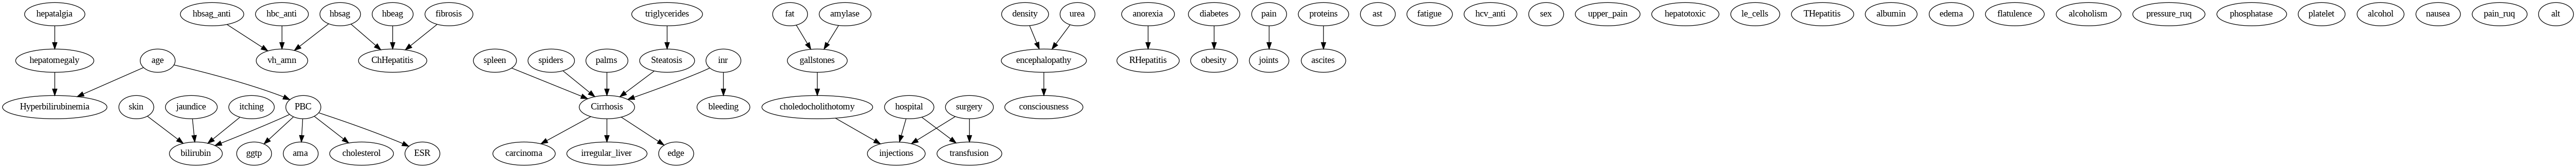

In [ ]:
# Import required libraries
import pandas as pd
import networkx as nx
import time

# Assuming df is your pandas DataFrame
# First, let's create a PC estimator instance

start_time4 = time.time()
pc = PC(data=df4)

# Run the PC algorithm
# change the parameters if needed
estimated_model4 = pc.estimate(max_cond_vars=5,significance_level=0.01, variant="parallel")



execution_time4 = time.time() - start_time4

print(f"\nExecution Time: {execution_time4:.2f} seconds")
print(f"                {execution_time4/60:.2f} minutes")

# The estimated_model is now a NetworkX DiGraph object
# Let's print some basic information about the learned structure
print("Number of nodes:", estimated_model4.number_of_nodes())
print("Number of edges:", estimated_model4.number_of_edges())
print("\nEdges in the learned DAG:")
for edge in estimated_model4.edges():
    print(f"{edge[0]} -> {edge[1]}")

# If you want to visualize the graph (optional)
display(Image((nx.drawing.nx_pydot.to_pydot(estimated_model4)).create_png()))


Structure Estimation for **hailfinder dataset**

*   Iterative approach
*   Time calculation



In [ ]:
# Import required libraries
import pandas as pd
import networkx as nx
import time

# Assuming df is your pandas DataFrame
# First, let's create a PC estimator instance

start_time5 = time.time()
pc = PC(data=df5)

# Run the PC algorithm
# change the parameters if needed
estimated_model5 = pc.estimate(max_cond_vars=5,significance_level=0.01)



execution_time5 = time.time() - start_time5

print(f"\nExecution Time: {execution_time5:.2f} seconds")
print(f"                {execution_time5/60:.2f} minutes")

# The estimated_model is now a NetworkX DiGraph object
# Let's print some basic information about the learned structure
print("Number of nodes:", estimated_model5.number_of_nodes())
print("Number of edges:", estimated_model5.number_of_edges())
print("\nEdges in the learned DAG:")
for edge in estimated_model5.edges():
    print(f"{edge[0]} -> {edge[1]}")

# If you want to visualize the graph (optional)
display(Image((nx.drawing.nx_pydot.to_pydot(estimated_model5)).create_png()))


  0%|          | 0/5 [00:00<?, ?it/s]

# PC class and algorithm with **Randomized** skeleton learning approach:

---

pgm py implementation

---



In [ ]:
import pandas as pd
import numpy as np
from scipy.special import comb
import random
import networkx as nx
from itertools import combinations, chain


class RandomizedPC(StructureEstimator):


    def __init__(self, data=None, independencies=None, sampling_ratio=0.7,
                 max_iterations=1, error_threshold=0.01, use_randomized=True, **kwargs):
        super(RandomizedPC, self).__init__(data=data, independencies=independencies, **kwargs)
        self.sampling_ratio = sampling_ratio
        self.max_iterations = max_iterations
        self.error_threshold = error_threshold
        self.use_randomized = use_randomized

    def estimate(
        self,
        variant="stable",
        ci_test="chi_square",
        max_cond_vars=5,
        return_type="dag",
        significance_level=0.01,
        n_jobs=-1,
        show_progress=True,
        **kwargs,
    ):
        """
        Estimate a DAG structure from data using either traditional or randomized PC algorithm.

        Parameters
        ----------
        variant : str, default="stable"
            One of: "orig", "stable", or "parallel"
        ci_test : str or callable
            Conditional independence test to use
        max_cond_vars : int, default=5
            Maximum number of conditional variables
        return_type : str, default="dag"
            One of: "dag", "cpdag", "skeleton"
        significance_level : float, default=0.01
            Alpha value for conditional independence tests
        n_jobs : int, default=-1
            Number of parallel jobs for parallel variant
        show_progress : bool, default=True
            Whether to show progress bar
        """
        # Parameter validation
        if variant not in ("orig", "stable", "parallel"):
            raise ValueError(f"variant must be one of: orig, stable, or parallel. Got: {variant}")
        elif (not callable(ci_test)) and (
            ci_test.lower() not in (list(CI_TESTS.keys()) + ["independence_match"])
        ):
            raise ValueError("ci_test must be a callable or one of the tests defined in CITests.py")

        if (ci_test == "independence_match") and (self.independencies is None):
            raise ValueError("For using independence_match, independencies argument must be specified")
        elif (ci_test in set(CI_TESTS.keys()) - set(["independence_match"])) and (
            self.data is None
        ):
            raise ValueError("For using Chi Square or Pearsonr, data argument must be specified")

        # Step 1: Build skeleton
        if self.use_randomized:
            skel, separating_sets = self.build_randomized_skeleton(
                ci_test=ci_test,
                max_cond_vars=max_cond_vars,
                significance_level=significance_level,
                n_jobs=n_jobs,
                show_progress=show_progress,
                **kwargs,
            )
        else:
            skel, separating_sets = self.build_skeleton(
                ci_test=ci_test,
                max_cond_vars=max_cond_vars,
                significance_level=significance_level,
                variant=variant,
                n_jobs=n_jobs,
                show_progress=show_progress,
                **kwargs,
            )

        if return_type.lower() == "skeleton":
            return skel, separating_sets

        # Step 2: Orient edges
        pdag = self.skeleton_to_pdag(skel, separating_sets)

        # Step 3: Return appropriate type
        if self.data is not None:
            pdag.add_nodes_from(set(self.data.columns) - set(pdag.nodes()))

        if return_type.lower() in ("pdag", "cpdag"):
            return pdag
        elif return_type.lower() == "dag":
            return pdag.to_dag()
        else:
            raise ValueError(
                f"return_type must be one of: dag, pdag, cpdag, or skeleton. Got: {return_type}"
            )

    def _calculate_optimal_sampling_ratio(self, level, k, prev_failures):
        """Calculate optimal sampling ratio based on Theorem 6."""
        if level == 0:
            return self.sampling_ratio

        n = len(self.variables)
        try:
            ratio = np.log(n) / (np.log(comb(k, level)) * np.prod(prev_failures))
            return max(0.7, min(1.0, ratio))
        except:
            return self.sampling_ratio

    def _sample_conditioning_sets(self, neighbors, level, sampling_ratio):
        """
        Randomly sample conditioning sets with proper handling of edge cases.

        Parameters:
        -----------
        neighbors : set
            Set of neighboring nodes
        level : int
            Size of conditioning sets
        sampling_ratio : float
            Ratio of sets to sample (between 0 and 1)

        Returns:
        --------
        list
            List of sampled conditioning sets
        """
        # If neighbors is smaller than level, return empty list
        if len(neighbors) < level:
            return []

        # Generate all possible combinations
        all_possible = list(combinations(neighbors, level))

        # Calculate sample size with a minimum of 1 and maximum of available combinations
        sample_size = max(1, min(len(all_possible), int(sampling_ratio * len(all_possible))))

        # Return random sample
        return random.sample(all_possible, sample_size)

    def build_randomized_skeleton(
        self,
        ci_test="chi_square",
        max_cond_vars=5,
        significance_level=0.01,
        n_jobs=-1,
        show_progress=True,
        **kwargs,
    ):
        """
        Build skeleton using randomized approach with theoretical guarantees.
        """
        if not callable(ci_test):
            try:
                ci_test = CI_TESTS[ci_test]
            except KeyError:
                raise ValueError(f"ci_test must be one of {list(CI_TESTS.keys())}, or a function.")

        # Initialize progress bar if needed
        if show_progress and config.SHOW_PROGRESS:
            pbar = tqdm(total=self.max_iterations)
            pbar.set_description("Running randomized skeleton learning iterations")

        # Initialize tracking structures
        best_graph = None
        best_separating_sets = None
        min_edges = float('inf')

        # Multiple iterations for error reduction (Theorem 7)
        for iteration in range(self.max_iterations):
            # Initialize a fully connected graph
            graph = nx.complete_graph(n=self.variables, create_using=nx.Graph)
            separating_sets = dict()
            prev_failures = []

            # For each level up to max_cond_vars
            for level in range(max_cond_vars + 1):
                # Calculate optimal sampling ratio for this level
                k = max(len(list(graph.neighbors(node))) for node in graph.nodes()) if graph.nodes() else 0
                sampling_ratio = self._calculate_optimal_sampling_ratio(level, k, prev_failures)

                # Get all edges in random order
                edges = list(graph.edges())
                if not edges:  # Early stopping if no edges left
                    break

                random.shuffle(edges)

                for u, v in edges:
                    u_neighbors = set(graph.neighbors(u)) - {v}
                    v_neighbors = set(graph.neighbors(v)) - {u}

                    # Get conditioning sets from both neighborhoods
                    u_sep_sets = self._sample_conditioning_sets(u_neighbors, level, sampling_ratio)
                    v_sep_sets = self._sample_conditioning_sets(v_neighbors, level, sampling_ratio)

                    # Test conditional independence
                    for separating_set in chain(u_sep_sets, v_sep_sets):
                        if ci_test(u, v, separating_set, data=self.data,
                                independencies=self.independencies,
                                significance_level=significance_level, **kwargs):
                            separating_sets[frozenset((u, v))] = separating_set
                            graph.remove_edge(u, v)
                            break

                # Update failure ratio
                total_possible_edges = len(self.variables) * (len(self.variables) - 1) / 2
                current_failure_ratio = graph.number_of_edges() / total_possible_edges if total_possible_edges > 0 else 0
                prev_failures.append(current_failure_ratio)

                # Early stopping if no more edges can be removed
                if graph.number_of_edges() == 0:
                    break

            # Keep the sparsest graph across iterations
            if graph.number_of_edges() < min_edges:
                min_edges = graph.number_of_edges()
                best_graph = graph.copy()
                best_separating_sets = separating_sets.copy()

            if show_progress and config.SHOW_PROGRESS:
                pbar.update(1)

        if show_progress and config.SHOW_PROGRESS:
            pbar.close()

        return best_graph, best_separating_sets

    def build_skeleton(
        self,
        ci_test="chi_square",
        max_cond_vars=5,
        significance_level=0.01,
        variant="stable",
        n_jobs=-1,
        show_progress=True,
        **kwargs,
    ):
        """
        Traditional PC algorithm skeleton building (kept for comparison and fallback).
        """
        lim_neighbors = 0
        separating_sets = dict()
        if not callable(ci_test):
            try:
                ci_test = CI_TESTS[ci_test]
            except KeyError:
                raise ValueError(
                    f"ci_test must be one of {list(CI_TESTS.keys())}, or a function."
                )

        if show_progress and config.SHOW_PROGRESS:
            pbar = tqdm(total=max_cond_vars)
            pbar.set_description("Working for n conditional variables: 0")

        graph = nx.complete_graph(n=self.variables, create_using=nx.Graph)

        while not all(
            [len(list(graph.neighbors(var))) < lim_neighbors for var in self.variables]
        ):
            if variant == "orig":
                for u, v in graph.edges():
                    for separating_set in chain(
                        combinations(set(graph.neighbors(u)) - set([v]), lim_neighbors),
                        combinations(set(graph.neighbors(v)) - set([u]), lim_neighbors),
                    ):
                        if ci_test(
                            u,
                            v,
                            separating_set,
                            data=self.data,
                            independencies=self.independencies,
                            significance_level=significance_level,
                            **kwargs,
                        ):
                            separating_sets[frozenset((u, v))] = separating_set
                            graph.remove_edge(u, v)
                            break

            elif variant == "stable":
                neighbors = {node: set(graph[node]) for node in graph.nodes()}
                for u, v in graph.edges():
                    for separating_set in chain(
                        combinations(neighbors[u] - set([v]), lim_neighbors),
                        combinations(neighbors[v] - set([u]), lim_neighbors),
                    ):
                        if ci_test(
                            u,
                            v,
                            separating_set,
                            data=self.data,
                            independencies=self.independencies,
                            significance_level=significance_level,
                            **kwargs,
                        ):
                            separating_sets[frozenset((u, v))] = separating_set
                            graph.remove_edge(u, v)
                            break

            elif variant == "parallel":
                neighbors = {node: set(graph[node]) for node in graph.nodes()}

                def _parallel_fun(u, v):
                    for separating_set in chain(
                        combinations(set(graph.neighbors(u)) - set([v]), lim_neighbors),
                        combinations(set(graph.neighbors(v)) - set([u]), lim_neighbors),
                    ):
                        if ci_test(
                            u,
                            v,
                            separating_set,
                            data=self.data,
                            independencies=self.independencies,
                            significance_level=significance_level,
                            **kwargs,
                        ):
                            return (u, v), separating_set
                    return None

                results = Parallel(n_jobs=n_jobs)(
                    delayed(_parallel_fun)(u, v) for (u, v) in graph.edges()
                )
                for result in results:
                    if result is not None:
                        (u, v), sep_set = result
                        graph.remove_edge(u, v)
                        separating_sets[frozenset((u, v))] = sep_set

            if lim_neighbors >= max_cond_vars:
                break
            lim_neighbors += 1

            if show_progress and config.SHOW_PROGRESS:
                pbar.update(1)
                pbar.set_description(
                    f"Working for n conditional variables: {lim_neighbors}"
                )

        if show_progress and config.SHOW_PROGRESS:
            pbar.close()

        return graph, separating_sets


    def skeleton_to_pdag(self, skeleton, separating_sets):

        pdag = skeleton.to_directed()
        node_pairs = list(permutations(pdag.nodes(), 2))

        # 1) for each X-Z-Y, if Z not in the separating set of X,Y, then orient edges as X->Z<-Y
        # (Algorithm 3.4 in Koller & Friedman PGM, page 86)
        for pair in node_pairs:
            X, Y = pair
            if not skeleton.has_edge(X, Y):
                for Z in set(skeleton.neighbors(X)) & set(skeleton.neighbors(Y)):
                    if Z not in separating_sets[frozenset((X, Y))]:
                        pdag.remove_edges_from([(Z, X), (Z, Y)])

        progress = True
        while progress:  # as long as edges can be oriented (removed)
            num_edges = pdag.number_of_edges()

            # 2) for each X->Z-Y, orient edges to Z->Y
            # (Explanation in Koller & Friedman PGM, page 88)
            for pair in node_pairs:
                X, Y = pair
                if not pdag.has_edge(X, Y):
                    for Z in (set(pdag.successors(X)) - set(pdag.predecessors(X))) & (
                        set(pdag.successors(Y)) & set(pdag.predecessors(Y))
                    ):
                        pdag.remove_edge(Y, Z)

            # 3) for each X-Y with a directed path from X to Y, orient edges to X->Y
            for pair in node_pairs:
                X, Y = pair
                if pdag.has_edge(Y, X) and pdag.has_edge(X, Y):
                    for path in nx.all_simple_paths(pdag, X, Y):
                        is_directed = True
                        for src, dst in list(zip(path, path[1:])):
                            if pdag.has_edge(dst, src):
                                is_directed = False
                        if is_directed:
                            pdag.remove_edge(Y, X)
                            break

            # 4) for each X-Z-Y with X->W, Y->W, and Z-W, orient edges to Z->W
            for pair in node_pairs:
                X, Y = pair
                for Z in (
                    set(pdag.successors(X))
                    & set(pdag.predecessors(X))
                    & set(pdag.successors(Y))
                    & set(pdag.predecessors(Y))
                ):
                    for W in (
                        (set(pdag.successors(X)) - set(pdag.predecessors(X)))
                        & (set(pdag.successors(Y)) - set(pdag.predecessors(Y)))
                        & (set(pdag.successors(Z)) & set(pdag.predecessors(Z)))
                    ):
                        pdag.remove_edge(W, Z)

            progress = num_edges > pdag.number_of_edges()

        # TODO: This is temp fix to get a PDAG object.
        edges = set(pdag.edges())
        undirected_edges = []
        directed_edges = []
        for u, v in edges:
            if (v, u) in edges:
                undirected_edges.append((u, v))
            else:
                directed_edges.append((u, v))
        return PDAG(directed_ebunch=directed_edges, undirected_ebunch=undirected_edges)


Structure Estimation for **Asia Cancer dataset**

*   **Randomized** approach
*   Time calculation



  0%|          | 0/1 [00:00<?, ?it/s]


Execution Time: 1.73 seconds
                0.03 minutes

Model Information:
Number of nodes: 8
Number of edges: 8

Edges in the learned DAG:
lung -> either
either -> xray
either -> dysp
bronc -> dysp
tub -> either
smoke -> lung
smoke -> bronc
asia -> tub


<ipython-input-25-1829eb9d1a73>:139: RuntimeWarning: divide by zero encountered in scalar divide
  ratio = np.log(n) / (np.log(comb(k, level)) * np.prod(prev_failures))
<ipython-input-25-1829eb9d1a73>:139: RuntimeWarning: divide by zero encountered in log
  ratio = np.log(n) / (np.log(comb(k, level)) * np.prod(prev_failures))


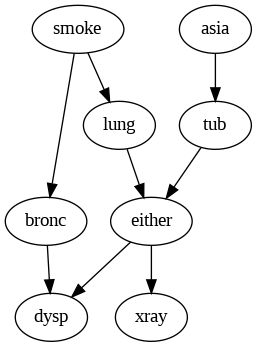

In [ ]:
# Import required libraries
import pandas as pd
import networkx as nx
import time  # Add this import

# Start timing
start_time_r1 = time.time()

# Create PC estimator instance
rpc = RandomizedPC(data=df)

# Run estimation with conservative parameters
estimated_model_r1 = rpc.estimate()

# Calculate execution time
execution_time_r1 = time.time() - start_time_r1

# Print timing information
print(f"\nExecution Time: {execution_time_r1:.2f} seconds")
print(f"                {execution_time_r1/60:.2f} minutes")

# Print model information
print("\nModel Information:")
print("Number of nodes:", estimated_model_r1.number_of_nodes())
print("Number of edges:", estimated_model_r1.number_of_edges())
print("\nEdges in the learned DAG:")
for edge in estimated_model_r1.edges():
    print(f"{edge[0]} -> {edge[1]}")

    # If you want to visualize the graph (optional)
display(Image((nx.drawing.nx_pydot.to_pydot(estimated_model_r1)).create_png()))

Structure Estimation for **London property dataset**

*   **Randomized** approach
*   Time calculation



  0%|          | 0/1 [00:00<?, ?it/s]


Execution Time: 124.86 seconds
                2.08 minutes

Model Information:
Number of nodes: 27
Number of edges: 31

Edges in the learned DAG:
borrowing -> interest
borrowing -> interestTaxRelief
borrowing -> LTV
interest -> interestTaxRelief
interestRate -> interest
interestRate -> interestTaxRelief
rentalGrossProfit -> actualRentalIncome
rentalGrossProfit -> rentalNetProfitBeforeInterest
actualRentalIncome -> rentalGrossYield
actualRentalIncome -> rentalIncomeT+1
capitalGains -> propertyValueT+1
propertyPurchaseValue -> rentalGrossYield
propertyPurchaseValue -> propertyValueT+1
propertyPurchaseValue -> capitalGains
propertyPurchaseValue -> LTV
otherPropertyExpenses -> propertyExpenses
otherPropertyExpenses -> otherPropertyExpensesT+1
propertyExpenses -> rentalGrossProfit
otherInterestFees -> interest
otherInterestFees -> interestTaxRelief
incomeTax -> rentalNetProfitBeforeInterest
rentalNetProfitBeforeInterest -> netProfit
rentalGrowth -> rentalIncomeT+1
capitalGrowth -> capital

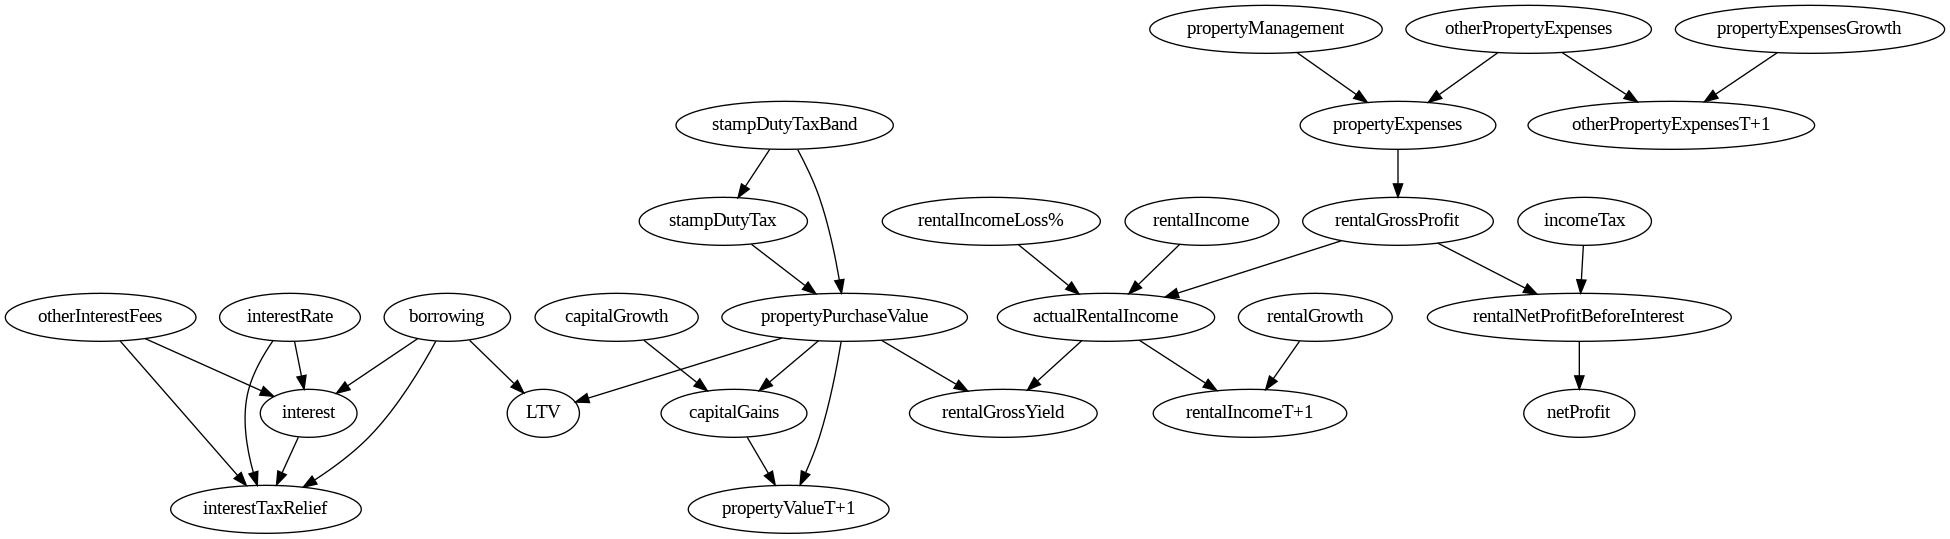

In [ ]:
# Import required libraries
import pandas as pd
import networkx as nx
import time  # Add this import

# Start timing
start_time_r2 = time.time()

# Create PC estimator instance
rpc = RandomizedPC(data=df2)

# Run estimation with conservative parameters
estimated_model_r2 = rpc.estimate()

# Calculate execution time
execution_time_r2 = time.time() - start_time_r2

# Print timing information
print(f"\nExecution Time: {execution_time_r2:.2f} seconds")
print(f"                {execution_time_r2/60:.2f} minutes")

# Print model information
print("\nModel Information:")
print("Number of nodes:", estimated_model_r2.number_of_nodes())
print("Number of edges:", estimated_model_r2.number_of_edges())
print("\nEdges in the learned DAG:")
for edge in estimated_model_r2.edges():
    print(f"{edge[0]} -> {edge[1]}")

    # If you want to visualize the graph (optional)
display(Image((nx.drawing.nx_pydot.to_pydot(estimated_model_r2)).create_png()))

Structure Estimation for **ALARM dataset**

*   **Randomized** approach
*   Time calculation



  0%|          | 0/1 [00:00<?, ?it/s]

<ipython-input-25-1829eb9d1a73>:139: RuntimeWarning: divide by zero encountered in scalar divide
  ratio = np.log(n) / (np.log(comb(k, level)) * np.prod(prev_failures))



Execution Time: 48.04 seconds
                0.80 minutes

Model Information:
Number of nodes: 37
Number of edges: 43

Edges in the learned DAG:
DISCONNECT -> VENTTUBE
VENTTUBE -> PRESS
VENTTUBE -> VENTLUNG
HYPOVOLEMIA -> STROKEVOLUME
HYPOVOLEMIA -> LVEDVOLUME
STROKEVOLUME -> CO
VENTALV -> PVSAT
VENTALV -> INTUBATION
VENTALV -> ARTCO2
PVSAT -> SAO2
INTUBATION -> SHUNT
INTUBATION -> PRESS
INTUBATION -> VENTLUNG
VENTMACH -> VENTTUBE
VENTMACH -> MINVOLSET
HR -> HRBP
HR -> HREKG
HR -> HRSAT
HR -> CATECHOL
HR -> CO
ARTCO2 -> CATECHOL
ARTCO2 -> EXPCO2
FIO2 -> PVSAT
TPR -> CATECHOL
TPR -> BP
VENTLUNG -> MINVOL
VENTLUNG -> VENTALV
VENTLUNG -> EXPCO2
LVFAILURE -> STROKEVOLUME
LVFAILURE -> LVEDVOLUME
LVEDVOLUME -> PCWP
LVEDVOLUME -> CVP
HREKG -> HRSAT
PULMEMBOLUS -> SHUNT
MINVOL -> INTUBATION
ERRCAUTER -> HREKG
ERRCAUTER -> HRSAT
CO -> BP
KINKEDTUBE -> PRESS
ERRLOWOUTPUT -> HRBP
PAP -> PULMEMBOLUS
HISTORY -> LVFAILURE
ANAPHYLAXIS -> TPR


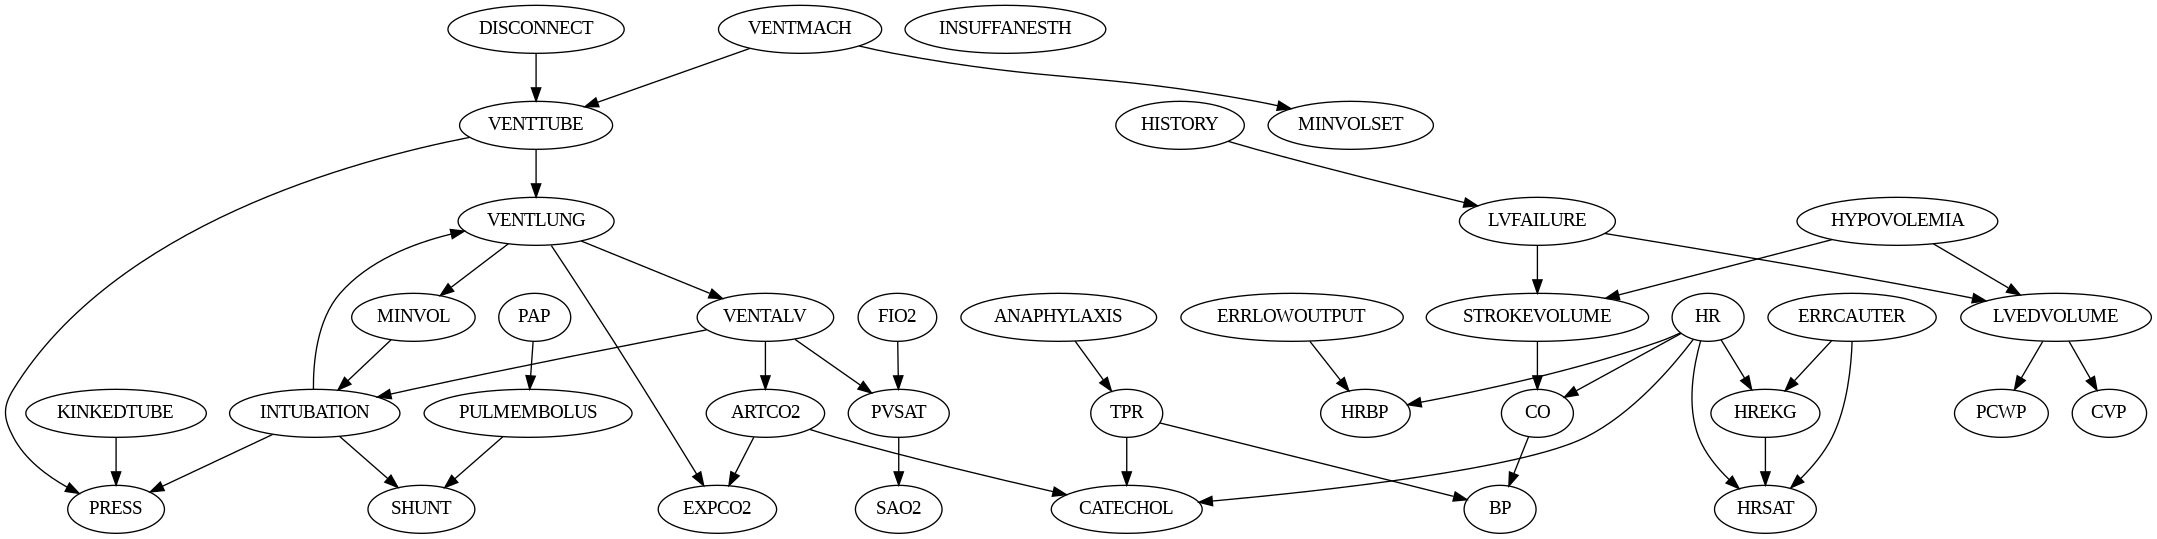

In [ ]:
# Import required libraries
import pandas as pd
import networkx as nx
import time  # Add this import

# Start timing
start_time_r3 = time.time()

# Create PC estimator instance
rpc = RandomizedPC(data=df3)

# Run estimation with conservative parameters
estimated_model_r3 = rpc.estimate()

# Calculate execution time
execution_time_r3 = time.time() - start_time_r3

# Print timing information
print(f"\nExecution Time: {execution_time_r3:.2f} seconds")
print(f"                {execution_time_r3/60:.2f} minutes")

# Print model information
print("\nModel Information:")
print("Number of nodes:", estimated_model_r3.number_of_nodes())
print("Number of edges:", estimated_model_r3.number_of_edges())
print("\nEdges in the learned DAG:")
for edge in estimated_model_r3.edges():
    print(f"{edge[0]} -> {edge[1]}")

    # If you want to visualize the graph (optional)
display(Image((nx.drawing.nx_pydot.to_pydot(estimated_model_r3)).create_png()))

Structure Estimation for **HEPAR2 dataset**

*   **Randomized** approach
*   Time calculation



  0%|          | 0/1 [00:00<?, ?it/s]


Execution Time: 1174.57 seconds
                19.58 minutes

Model Information:
Number of nodes: 70
Number of edges: 42

Edges in the learned DAG:
age -> Hyperbilirubinemia
age -> PBC
skin -> bilirubin
hbsag_anti -> vh_amn
carcinoma -> Cirrhosis
Cirrhosis -> edge
Cirrhosis -> irregular_liver
hbsag -> ChHepatitis
hbsag -> vh_amn
inr -> Cirrhosis
inr -> bleeding
spleen -> Cirrhosis
gallstones -> choledocholithotomy
choledocholithotomy -> injections
jaundice -> bilirubin
PBC -> ggtp
PBC -> ama
PBC -> cholesterol
PBC -> bilirubin
PBC -> ESR
itching -> bilirubin
nausea -> amylase
fat -> gallstones
hepatomegaly -> Hyperbilirubinemia
density -> encephalopathy
encephalopathy -> consciousness
triglycerides -> Steatosis
spiders -> Cirrhosis
surgery -> transfusion
surgery -> injections
anorexia -> RHepatitis
hbeag -> ChHepatitis
urea -> encephalopathy
hbc_anti -> vh_amn
hospital -> transfusion
hospital -> injections
diabetes -> obesity
palms -> Cirrhosis
fibrosis -> ChHepatitis
hepatalgia -> h

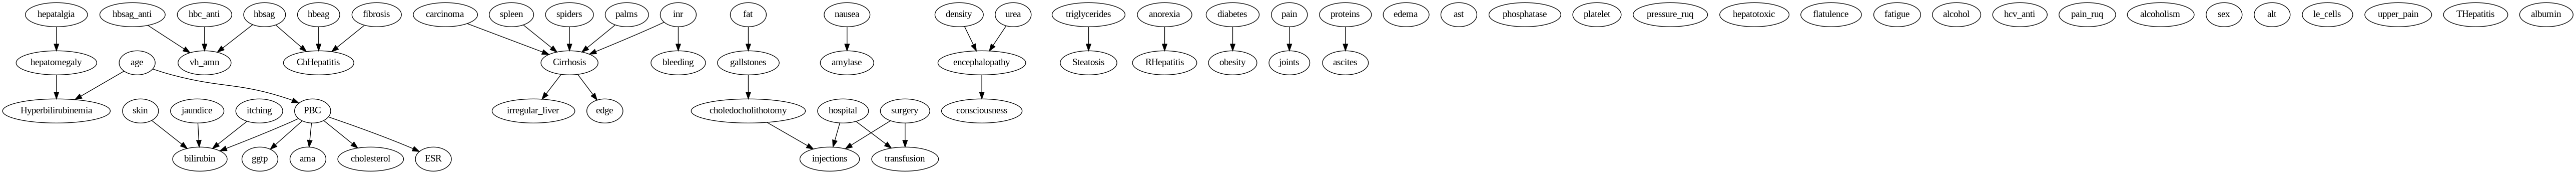

In [ ]:
# Import required libraries
import pandas as pd
import networkx as nx
import time  # Add this import

# Start timing
start_time_r4 = time.time()

# Create PC estimator instance
rpc = RandomizedPC(data=df4)

# Run estimation with conservative parameters
estimated_model_r4 = rpc.estimate(max_cond_vars=5,significance_level=0.01, variant="parallel")

# Calculate execution time
execution_time_r4 = time.time() - start_time_r4

# Print timing information
print(f"\nExecution Time: {execution_time_r4:.2f} seconds")
print(f"                {execution_time_r4/60:.2f} minutes")

# Print model information
print("\nModel Information:")
print("Number of nodes:", estimated_model_r4.number_of_nodes())
print("Number of edges:", estimated_model_r4.number_of_edges())
print("\nEdges in the learned DAG:")
for edge in estimated_model_r4.edges():
    print(f"{edge[0]} -> {edge[1]}")

    # If you want to visualize the graph (optional)
display(Image((nx.drawing.nx_pydot.to_pydot(estimated_model_r4)).create_png()))

Structure Estimation for **Hailfinder dataset**

*   **Randomized** approach
*   Time calculation



In [ ]:
# Import required libraries
import pandas as pd
import networkx as nx
import time  # Add this import

# Start timing
start_time_r5 = time.time()

# Create PC estimator instance
rpc = RandomizedPC(data=df4)

# Run estimation with conservative parameters
estimated_model_r5 = rpc.estimate(max_cond_vars=5,significance_level=0.01, variant="parallel")

# Calculate execution time
execution_time_r5 = time.time() - start_time_r5

# Print timing information
print(f"\nExecution Time: {execution_time_r5:.2f} seconds")
print(f"                {execution_time_r5/60:.2f} minutes")

# Print model information
print("\nModel Information:")
print("Number of nodes:", estimated_model_r5.number_of_nodes())
print("Number of edges:", estimated_model_r5.number_of_edges())
print("\nEdges in the learned DAG:")
for edge in estimated_model_r5.edges():
    print(f"{edge[0]} -> {edge[1]}")

    # If you want to visualize the graph (optional)
display(Image((nx.drawing.nx_pydot.to_pydot(estimated_model_r5)).create_png()))

# Time comparison for the iterative and randomized approach on different datasets.

**Latex table**

In [ ]:
import pandas as pd
from tabulate import tabulate

# Create a dictionary for the data
data = {
    "Dataset": ["Asia Cancer", "London Property", "ALARM", "HEPAR2"],
    "Iterative Approach (seconds)": [execution_time1, execution_time2, execution_time3, execution_time4],
    "Randomized Approach (seconds)": [execution_time_r1, execution_time_r2, execution_time_r3, execution_time_r4]
}

# Create a DataFrame
dfx = pd.DataFrame(data)

# Display as a table in LaTeX format
table_latex = tabulate(dfx, headers="keys", tablefmt="latex", showindex=False)
print(table_latex)


\begin{tabular}{lrr}
\hline
 Dataset         &   Iterative Approach (seconds) &   Randomized Approach (seconds) \\
\hline
 Asia Cancer     &                          2.176 &                           1.731 \\
 London Property &                        125.401 &                         124.86  \\
 ALARM           &                         65.896 &                          48.04  \\
 HEPAR2          &                        199.826 &                        2109.5   \\
\hline
\end{tabular}


**Table Image**

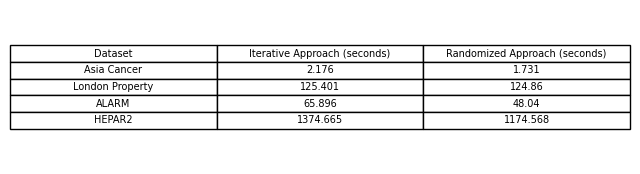

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Round the execution times to 3 decimal places
execution_time1 = round(execution_time1, 3)
execution_time2 = round(execution_time2, 3)
execution_time3 = round(execution_time3, 3)
execution_time4 = round(execution_time4, 3)
execution_time_r1 = round(execution_time_r1, 3)
execution_time_r2 = round(execution_time_r2, 3)
execution_time_r3 = round(execution_time_r3, 3)
execution_time_r4 = round(execution_time_r4, 3)

# Create a dictionary for the data
data = {
    "Dataset": ["Asia Cancer", "London Property", "ALARM", "HEPAR2"],
    "Iterative Approach (seconds)": [execution_time1, execution_time2, execution_time3, execution_time4],
    "Randomized Approach (seconds)": [execution_time_r1, execution_time_r2, execution_time_r3, execution_time_r4]
}

# Create a DataFrame
dfx = pd.DataFrame(data)

# Plot the table as an image
fig, ax = plt.subplots(figsize=(8, 2))
ax.axis("tight")
ax.axis("off")
table = ax.table(cellText=dfx.values, colLabels=dfx.columns, cellLoc="center", loc="center")

# Save the table as an image
plt.savefig("execution_times_table.png", bbox_inches="tight", dpi=300)
plt.show()


In [ ]:
#######################################CAUTION!!!#############################################
####################################### Groundtruth Preparation Under Progress #############################################
####################################### Authorised Personal Allowed #############################################

In [ ]:
!pip install pgmpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.8 MB/s eta 0:00:00


**EVALUATION ON HEPAR2**

In [ ]:
import gzip
import re

def extract_edges_from_bif_gz(file_path):
    # Step 1: Decompress and read the .bif.gz file
    with gzip.open(file_path, 'rt', encoding='utf-8') as file:
        bif_content = file.read()

    # Step 2: Extract variable names and dependencies (edges) using regular expressions
    variables = re.findall(r'variable\s+(\w+)\s*{[^}]+type\s+discrete\s*\[\s*\d+\s*\]\s*\{\s*([^\}]+)\s*\};', bif_content)
    dependencies = re.findall(r'probability\s*\(\s*(\w+)\s*\|\s*([^)]+)\)\s*\{', bif_content)

    # Step 3: Extract edges as tuples of (parent, child) based on dependencies
    edges = []
    for child, parents in dependencies:
        parent_list = [parent.strip() for parent in parents.split(',')]
        for parent in parent_list:
            edges.append((parent, child))

    return edges

# Usage
# Replace '/path/to/your/file.bif.gz' with the actual path to your .bif.gz file
file_path = '/content/hepar2.bif.gz'
edges = extract_edges_from_bif_gz(file_path)

# Output the list of edges
print("Groundtruth edges:", edges)


Groundtruth edges: [('hepatotoxic', 'THepatitis'), ('alcoholism', 'THepatitis'), ('gallstones', 'choledocholithotomy'), ('hospital', 'injections'), ('surgery', 'injections'), ('choledocholithotomy', 'injections'), ('hospital', 'transfusion'), ('surgery', 'transfusion'), ('choledocholithotomy', 'transfusion'), ('transfusion', 'ChHepatitis'), ('vh_amn', 'ChHepatitis'), ('injections', 'ChHepatitis'), ('sex', 'PBC'), ('age', 'PBC'), ('ChHepatitis', 'fibrosis'), ('diabetes', 'obesity'), ('obesity', 'Steatosis'), ('alcoholism', 'Steatosis'), ('fibrosis', 'Cirrhosis'), ('Steatosis', 'Cirrhosis'), ('age', 'Hyperbilirubinemia'), ('sex', 'Hyperbilirubinemia'), ('Steatosis', 'triglycerides'), ('hepatotoxic', 'RHepatitis'), ('ChHepatitis', 'fatigue'), ('THepatitis', 'fatigue'), ('RHepatitis', 'fatigue'), ('Hyperbilirubinemia', 'bilirubin'), ('PBC', 'bilirubin'), ('Cirrhosis', 'bilirubin'), ('gallstones', 'bilirubin'), ('ChHepatitis', 'bilirubin'), ('bilirubin', 'itching'), ('gallstones', 'upper_pa

In [ ]:
Groundtruth_edges = [('hepatotoxic', 'THepatitis'), ('alcoholism', 'THepatitis'), ('gallstones', 'choledocholithotomy'), ('hospital', 'injections'), ('surgery', 'injections'), ('choledocholithotomy', 'injections'), ('hospital', 'transfusion'), ('surgery', 'transfusion'), ('choledocholithotomy', 'transfusion'), ('transfusion', 'ChHepatitis'), ('vh_amn', 'ChHepatitis'), ('injections', 'ChHepatitis'), ('sex', 'PBC'), ('age', 'PBC'), ('ChHepatitis', 'fibrosis'), ('diabetes', 'obesity'), ('obesity', 'Steatosis'), ('alcoholism', 'Steatosis'), ('fibrosis', 'Cirrhosis'), ('Steatosis', 'Cirrhosis'), ('age', 'Hyperbilirubinemia'), ('sex', 'Hyperbilirubinemia'), ('Steatosis', 'triglycerides'), ('hepatotoxic', 'RHepatitis'), ('ChHepatitis', 'fatigue'), ('THepatitis', 'fatigue'), ('RHepatitis', 'fatigue'), ('Hyperbilirubinemia', 'bilirubin'), ('PBC', 'bilirubin'), ('Cirrhosis', 'bilirubin'), ('gallstones', 'bilirubin'), ('ChHepatitis', 'bilirubin'), ('bilirubin', 'itching'), ('gallstones', 'upper_pain'), ('gallstones', 'fat'), ('Steatosis', 'pain_ruq'), ('Hyperbilirubinemia', 'pain_ruq'), ('gallstones', 'pressure_ruq'), ('PBC', 'pressure_ruq'), ('ChHepatitis', 'pressure_ruq'), ('RHepatitis', 'phosphatase'), ('THepatitis', 'phosphatase'), ('Cirrhosis', 'phosphatase'), ('ChHepatitis', 'phosphatase'), ('bilirubin', 'skin'), ('PBC', 'ama'), ('PBC', 'le_cells'), ('PBC', 'joints'), ('PBC', 'pain'), ('joints', 'pain'), ('Cirrhosis', 'proteins'), ('Cirrhosis', 'edema'), ('Cirrhosis', 'platelet'), ('PBC', 'platelet'), ('ChHepatitis', 'inr'), ('Cirrhosis', 'inr'), ('THepatitis', 'inr'), ('Hyperbilirubinemia', 'inr'), ('platelet', 'bleeding'), ('inr', 'bleeding'), ('gallstones', 'flatulence'), ('Cirrhosis', 'alcohol'), ('Cirrhosis', 'encephalopathy'), ('PBC', 'encephalopathy'), ('encephalopathy', 'urea'), ('proteins', 'ascites'), ('RHepatitis', 'hepatomegaly'), ('THepatitis', 'hepatomegaly'), ('Steatosis', 'hepatomegaly'), ('Hyperbilirubinemia', 'hepatomegaly'), ('hepatomegaly', 'hepatalgia'), ('encephalopathy', 'density'), ('PBC', 'ESR'), ('ChHepatitis', 'ESR'), ('Steatosis', 'ESR'), ('Hyperbilirubinemia', 'ESR'), ('ChHepatitis', 'alt'), ('RHepatitis', 'alt'), ('THepatitis', 'alt'), ('Steatosis', 'alt'), ('Cirrhosis', 'alt'), ('ChHepatitis', 'ast'), ('RHepatitis', 'ast'), ('THepatitis', 'ast'), ('Steatosis', 'ast'), ('Cirrhosis', 'ast'), ('gallstones', 'amylase'), ('PBC', 'ggtp'), ('THepatitis', 'ggtp'), ('RHepatitis', 'ggtp'), ('Steatosis', 'ggtp'), ('ChHepatitis', 'ggtp'), ('Hyperbilirubinemia', 'ggtp'), ('PBC', 'cholesterol'), ('Steatosis', 'cholesterol'), ('ChHepatitis', 'cholesterol'), ('vh_amn', 'hbsag'), ('ChHepatitis', 'hbsag'), ('vh_amn', 'hbsag_anti'), ('ChHepatitis', 'hbsag_anti'), ('hbsag', 'hbsag_anti'), ('RHepatitis', 'anorexia'), ('THepatitis', 'anorexia'), ('RHepatitis', 'nausea'), ('THepatitis', 'nausea'), ('Cirrhosis', 'spleen'), ('RHepatitis', 'spleen'), ('THepatitis', 'spleen'), ('encephalopathy', 'consciousness'), ('Cirrhosis', 'spiders'), ('bilirubin', 'jaundice'), ('Cirrhosis', 'albumin'), ('Cirrhosis', 'edge'), ('Cirrhosis', 'irregular_liver'), ('vh_amn', 'hbc_anti'), ('ChHepatitis', 'hbc_anti'), ('vh_amn', 'hcv_anti'), ('ChHepatitis', 'hcv_anti'), ('Cirrhosis', 'palms'), ('vh_amn', 'hbeag'), ('ChHepatitis', 'hbeag'), ('Cirrhosis', 'carcinoma'), ('PBC', 'carcinoma')]

learned_edges_r = [
    ('age', 'Hyperbilirubinemia'),
    ('age', 'PBC'),
    ('skin', 'bilirubin'),
    ('hbsag_anti', 'vh_amn'),
    ('carcinoma', 'Cirrhosis'),
    ('Cirrhosis', 'edge'),
    ('Cirrhosis', 'irregular_liver'),
    ('hbsag', 'ChHepatitis'),
    ('hbsag', 'vh_amn'),
    ('inr', 'Cirrhosis'),
    ('inr', 'bleeding'),
    ('spleen', 'Cirrhosis'),
    ('gallstones', 'choledocholithotomy'),
    ('choledocholithotomy', 'injections'),
    ('jaundice', 'bilirubin'),
    ('PBC', 'ggtp'),
    ('PBC', 'ama'),
    ('PBC', 'cholesterol'),
    ('PBC', 'bilirubin'),
    ('PBC', 'ESR'),
    ('itching', 'bilirubin'),
    ('nausea', 'amylase'),
    ('fat', 'gallstones'),
    ('hepatomegaly', 'Hyperbilirubinemia'),
    ('density', 'encephalopathy'),
    ('encephalopathy', 'consciousness'),
    ('triglycerides', 'Steatosis'),
    ('spiders', 'Cirrhosis'),
    ('surgery', 'transfusion'),
    ('surgery', 'injections'),
    ('anorexia', 'RHepatitis'),
    ('hbeag', 'ChHepatitis'),
    ('urea', 'encephalopathy'),
    ('hbc_anti', 'vh_amn'),
    ('hospital', 'transfusion'),
    ('hospital', 'injections'),
    ('diabetes', 'obesity'),
    ('palms', 'Cirrhosis'),
    ('fibrosis', 'ChHepatitis'),
    ('hepatalgia', 'hepatomegaly'),
    ('pain', 'joints'),
    ('proteins', 'ascites')
]

learned_edges = [
    ('age', 'Hyperbilirubinemia'),
    ('age', 'PBC'),
    ('skin', 'bilirubin'),
    ('hbsag_anti', 'vh_amn'),
    ('hbsag', 'ChHepatitis'),
    ('hbsag', 'vh_amn'),
    ('Steatosis', 'Cirrhosis'),
    ('Cirrhosis', 'edge'),
    ('Cirrhosis', 'carcinoma'),
    ('Cirrhosis', 'irregular_liver'),
    ('inr', 'Cirrhosis'),
    ('inr', 'bleeding'),
    ('spleen', 'Cirrhosis'),
    ('gallstones', 'choledocholithotomy'),
    ('choledocholithotomy', 'injections'),
    ('jaundice', 'bilirubin'),
    ('PBC', 'ggtp'),
    ('PBC', 'ama'),
    ('PBC', 'cholesterol'),
    ('PBC', 'bilirubin'),
    ('PBC', 'ESR'),
    ('itching', 'bilirubin'),
    ('fat', 'gallstones'),
    ('hepatomegaly', 'Hyperbilirubinemia'),
    ('density', 'encephalopathy'),
    ('encephalopathy', 'consciousness'),
    ('triglycerides', 'Steatosis'),
    ('spiders', 'Cirrhosis'),
    ('surgery', 'transfusion'),
    ('surgery', 'injections'),
    ('anorexia', 'RHepatitis'),
    ('urea', 'encephalopathy'),
    ('hbeag', 'ChHepatitis'),
    ('hbc_anti', 'vh_amn'),
    ('hospital', 'transfusion'),
    ('hospital', 'injections'),
    ('diabetes', 'obesity'),
    ('palms', 'Cirrhosis'),
    ('amylase', 'gallstones'),
    ('fibrosis', 'ChHepatitis'),
    ('hepatalgia', 'hepatomegaly'),
    ('pain', 'joints'),
    ('proteins', 'ascites')
]

import networkx as nx

# Convert directed edges to undirected
def undirect_edges(edges):
    undirected_edges = []
    for edge in edges:
        undirected_edges.append((edge[0], edge[1]))
        undirected_edges.append((edge[1], edge[0]))
    return undirected_edges

# Create graphs from learned and ground truth edges
G_learned = nx.Graph()
G_ground_truth = nx.Graph()

G_learned.add_edges_from(undirect_edges(learned_edges_r))
G_ground_truth.add_edges_from(undirect_edges(Groundtruth_edges))

# Evaluate accuracy
def evaluate_accuracy(G1, G2):
    # Intersection of edges
    common_edges = G1.edges() & G2.edges()

    # Calculate precision, recall, and F1-score
    precision = len(common_edges) / len(G1.edges())
    recall = len(common_edges) / len(G2.edges())
    f1_score = 2 * (precision * recall) / (precision + recall)

    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1_score)

# Evaluate the learned model against the ground truth
evaluate_accuracy(G_learned, G_ground_truth)


Precision: 0.9761904761904762
Recall: 0.3333333333333333
F1-Score: 0.4969696969696969


In [ ]:
G_learned = nx.Graph()
G_ground_truth = nx.Graph()

G_learned.add_edges_from(undirect_edges(learned_edges))
G_ground_truth.add_edges_from(undirect_edges(Groundtruth_edges))

evaluate_accuracy(G_learned, G_ground_truth)

Precision: 1.0
Recall: 0.34959349593495936
F1-Score: 0.5180722891566265


**EVALUATION ON ASIA**

In [ ]:
import gzip
import re

# Usage
# Replace '/path/to/your/file.bif.gz' with the actual path to your .bif.gz file
file_path = '/content/asia.bif.gz'
edges = extract_edges_from_bif_gz(file_path)

# Output the list of edges
print("Groundtruth edges:", edges)

Groundtruth edges: [('asia', 'tub'), ('smoke', 'lung'), ('smoke', 'bronc'), ('lung', 'either'), ('tub', 'either'), ('either', 'xray'), ('bronc', 'dysp'), ('either', 'dysp')]


In [ ]:
Groundtruth_edges = [('asia', 'tub'), ('smoke', 'lung'), ('smoke', 'bronc'), ('lung', 'either'), ('tub', 'either'), ('either', 'xray'), ('bronc', 'dysp'), ('either', 'dysp')]
learned_edges = [
    ('lung', 'either'),
    ('either', 'xray'),
    ('either', 'dysp'),
    ('bronc', 'dysp'),
    ('asia', 'tub'),
    ('smoke', 'lung'),
    ('smoke', 'bronc')
]

learned_edges_r = [
    ('lung', 'either'),
    ('either', 'xray'),
    ('either', 'dysp'),
    ('bronc', 'dysp'),
    ('tub', 'either'),
    ('smoke', 'lung'),
    ('smoke', 'bronc'),
    ('asia', 'tub')
]


G_learned = nx.Graph()
G_ground_truth = nx.Graph()

G_learned.add_edges_from(undirect_edges(learned_edges))
G_ground_truth.add_edges_from(undirect_edges(Groundtruth_edges))

print("Iterative : \n")
evaluate_accuracy(G_learned, G_ground_truth)

G_learned = nx.Graph()
G_ground_truth = nx.Graph()

G_learned.add_edges_from(undirect_edges(learned_edges_r))
G_ground_truth.add_edges_from(undirect_edges(Groundtruth_edges))

print("\n")


print("Randomized : \n")
evaluate_accuracy(G_learned, G_ground_truth)

Iterative : 

Precision: 1.0
Recall: 0.875
F1-Score: 0.9333333333333333


Randomized : 

Precision: 1.0
Recall: 1.0
F1-Score: 1.0


**EVALUATION ON ALARM**

In [ ]:
import gzip
import re


# Usage
# Replace '/path/to/your/file.bif.gz' with the actual path to your .bif.gz file
file_path = '/content/alarm.bif.gz'
edges = extract_edges_from_bif_gz(file_path)

# Output the list of edges
print("Groundtruth edges:", edges)

Groundtruth edges: [('LVFAILURE', 'HISTORY'), ('LVEDVOLUME', 'CVP'), ('LVEDVOLUME', 'PCWP'), ('HYPOVOLEMIA', 'LVEDVOLUME'), ('LVFAILURE', 'LVEDVOLUME'), ('HYPOVOLEMIA', 'STROKEVOLUME'), ('LVFAILURE', 'STROKEVOLUME'), ('ERRLOWOUTPUT', 'HRBP'), ('HR', 'HRBP'), ('ERRCAUTER', 'HREKG'), ('HR', 'HREKG'), ('ERRCAUTER', 'HRSAT'), ('HR', 'HRSAT'), ('ANAPHYLAXIS', 'TPR'), ('ARTCO2', 'EXPCO2'), ('VENTLUNG', 'EXPCO2'), ('INTUBATION', 'MINVOL'), ('VENTLUNG', 'MINVOL'), ('FIO2', 'PVSAT'), ('VENTALV', 'PVSAT'), ('PVSAT', 'SAO2'), ('SHUNT', 'SAO2'), ('PULMEMBOLUS', 'PAP'), ('INTUBATION', 'SHUNT'), ('PULMEMBOLUS', 'SHUNT'), ('INTUBATION', 'PRESS'), ('KINKEDTUBE', 'PRESS'), ('VENTTUBE', 'PRESS'), ('MINVOLSET', 'VENTMACH'), ('DISCONNECT', 'VENTTUBE'), ('VENTMACH', 'VENTTUBE'), ('INTUBATION', 'VENTLUNG'), ('KINKEDTUBE', 'VENTLUNG'), ('VENTTUBE', 'VENTLUNG'), ('INTUBATION', 'VENTALV'), ('VENTLUNG', 'VENTALV'), ('VENTALV', 'ARTCO2'), ('ARTCO2', 'CATECHOL'), ('INSUFFANESTH', 'CATECHOL'), ('SAO2', 'CATECHOL')

In [ ]:
Groundtruth_edges = [('LVFAILURE', 'HISTORY'), ('LVEDVOLUME', 'CVP'), ('LVEDVOLUME', 'PCWP'), ('HYPOVOLEMIA', 'LVEDVOLUME'), ('LVFAILURE', 'LVEDVOLUME'), ('HYPOVOLEMIA', 'STROKEVOLUME'), ('LVFAILURE', 'STROKEVOLUME'), ('ERRLOWOUTPUT', 'HRBP'), ('HR', 'HRBP'), ('ERRCAUTER', 'HREKG'), ('HR', 'HREKG'), ('ERRCAUTER', 'HRSAT'), ('HR', 'HRSAT'), ('ANAPHYLAXIS', 'TPR'), ('ARTCO2', 'EXPCO2'), ('VENTLUNG', 'EXPCO2'), ('INTUBATION', 'MINVOL'), ('VENTLUNG', 'MINVOL'), ('FIO2', 'PVSAT'), ('VENTALV', 'PVSAT'), ('PVSAT', 'SAO2'), ('SHUNT', 'SAO2'), ('PULMEMBOLUS', 'PAP'), ('INTUBATION', 'SHUNT'), ('PULMEMBOLUS', 'SHUNT'), ('INTUBATION', 'PRESS'), ('KINKEDTUBE', 'PRESS'), ('VENTTUBE', 'PRESS'), ('MINVOLSET', 'VENTMACH'), ('DISCONNECT', 'VENTTUBE'), ('VENTMACH', 'VENTTUBE'), ('INTUBATION', 'VENTLUNG'), ('KINKEDTUBE', 'VENTLUNG'), ('VENTTUBE', 'VENTLUNG'), ('INTUBATION', 'VENTALV'), ('VENTLUNG', 'VENTALV'), ('VENTALV', 'ARTCO2'), ('ARTCO2', 'CATECHOL'), ('INSUFFANESTH', 'CATECHOL'), ('SAO2', 'CATECHOL'), ('TPR', 'CATECHOL'), ('CATECHOL', 'HR'), ('HR', 'CO'), ('STROKEVOLUME', 'CO'), ('CO', 'BP'), ('TPR', 'BP')]

learned_edges = [
    ('DISCONNECT', 'VENTTUBE'),
    ('VENTTUBE', 'PRESS'),
    ('VENTTUBE', 'VENTLUNG'),
    ('HYPOVOLEMIA', 'STROKEVOLUME'),
    ('HYPOVOLEMIA', 'LVEDVOLUME'),
    ('STROKEVOLUME', 'CO'),
    ('VENTALV', 'PVSAT'),
    ('VENTALV', 'INTUBATION'),
    ('VENTALV', 'ARTCO2'),
    ('PVSAT', 'SAO2'),
    ('INTUBATION', 'SHUNT'),
    ('INTUBATION', 'PRESS'),
    ('INTUBATION', 'VENTLUNG'),
    ('VENTMACH', 'VENTTUBE'),
    ('VENTMACH', 'MINVOLSET'),
    ('HR', 'HRBP'),
    ('HR', 'HREKG'),
    ('HR', 'HRSAT'),
    ('HR', 'CATECHOL'),
    ('HR', 'CO'),
    ('ARTCO2', 'CATECHOL'),
    ('ARTCO2', 'EXPCO2'),
    ('FIO2', 'PVSAT'),
    ('VENTLUNG', 'MINVOL'),
    ('VENTLUNG', 'VENTALV'),
    ('VENTLUNG', 'EXPCO2'),
    ('LVFAILURE', 'STROKEVOLUME'),
    ('LVFAILURE', 'LVEDVOLUME'),
    ('LVEDVOLUME', 'PCWP'),
    ('LVEDVOLUME', 'CVP'),
    ('HREKG', 'HRSAT'),
    ('PULMEMBOLUS', 'SHUNT'),
    ('MINVOL', 'INTUBATION'),
    ('ERRCAUTER', 'HREKG'),
    ('ERRCAUTER', 'HRSAT'),
    ('CO', 'BP'),
    ('ANAPHYLAXIS', 'TPR'),
    ('TPR', 'BP'),
    ('KINKEDTUBE', 'PRESS'),
    ('ERRLOWOUTPUT', 'HRBP'),
    ('PAP', 'PULMEMBOLUS'),
    ('HISTORY', 'LVFAILURE')
]

learned_edges_r = [
    ('DISCONNECT', 'VENTTUBE'),
    ('VENTTUBE', 'PRESS'),
    ('VENTTUBE', 'VENTLUNG'),
    ('HYPOVOLEMIA', 'STROKEVOLUME'),
    ('HYPOVOLEMIA', 'LVEDVOLUME'),
    ('STROKEVOLUME', 'CO'),
    ('VENTALV', 'PVSAT'),
    ('VENTALV', 'INTUBATION'),
    ('VENTALV', 'ARTCO2'),
    ('PVSAT', 'SAO2'),
    ('INTUBATION', 'SHUNT'),
    ('INTUBATION', 'PRESS'),
    ('INTUBATION', 'VENTLUNG'),
    ('VENTMACH', 'VENTTUBE'),
    ('VENTMACH', 'MINVOLSET'),
    ('HR', 'HRBP'),
    ('HR', 'HREKG'),
    ('HR', 'HRSAT'),
    ('HR', 'CATECHOL'),
    ('HR', 'CO'),
    ('ARTCO2', 'CATECHOL'),
    ('ARTCO2', 'EXPCO2'),
    ('FIO2', 'PVSAT'),
    ('TPR', 'CATECHOL'),
    ('TPR', 'BP'),
    ('VENTLUNG', 'MINVOL'),
    ('VENTLUNG', 'VENTALV'),
    ('VENTLUNG', 'EXPCO2'),
    ('LVFAILURE', 'STROKEVOLUME'),
    ('LVFAILURE', 'LVEDVOLUME'),
    ('LVEDVOLUME', 'PCWP'),
    ('LVEDVOLUME', 'CVP'),
    ('HREKG', 'HRSAT'),
    ('PULMEMBOLUS', 'SHUNT'),
    ('MINVOL', 'INTUBATION'),
    ('ERRCAUTER', 'HREKG'),
    ('ERRCAUTER', 'HRSAT'),
    ('CO', 'BP'),
    ('KINKEDTUBE', 'PRESS'),
    ('ERRLOWOUTPUT', 'HRBP'),
    ('PAP', 'PULMEMBOLUS'),
    ('HISTORY', 'LVFAILURE'),
    ('ANAPHYLAXIS', 'TPR')
]


G_learned = nx.Graph()
G_ground_truth = nx.Graph()

G_learned.add_edges_from(undirect_edges(learned_edges))
G_ground_truth.add_edges_from(undirect_edges(Groundtruth_edges))

print("Iterative : \n")
evaluate_accuracy(G_learned, G_ground_truth)

G_learned = nx.Graph()
G_ground_truth = nx.Graph()

G_learned.add_edges_from(undirect_edges(learned_edges_r))
G_ground_truth.add_edges_from(undirect_edges(Groundtruth_edges))

print("\n")


print("Randomized : \n")
evaluate_accuracy(G_learned, G_ground_truth)

Iterative : 

Precision: 0.9761904761904762
Recall: 0.8913043478260869
F1-Score: 0.9318181818181818


Randomized : 

Precision: 0.9767441860465116
Recall: 0.9130434782608695
F1-Score: 0.9438202247191011
